# Análise exploratória de dados (R)

## Instalar a biblioteca do `tidyverse`

Se a biblioteca `tidyverse` e `e1071` não estiverem instaladas, pode ser instalada pelo repositório do CRAN (isto deve ser feito fora do `jupyter`):

```
install.packages("tidyverse")
install.packages("e1071")
```

## Importar a biblioteca do `tidyverse` e do `e1071`

In [1]:
library(tidyverse)
library(e1071)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Importando os dados

In [2]:
data_port <- read_csv2('student-por.csv',
                 col_types = cols(.default = col_character()))

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.



## Conferindo o número de amostras

In [3]:
# Number os samples
nrow(data_port)

[1] 649

## Verificando os dados

In [4]:
# Show dataset
head(data_port)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13


## Gráficos de frequência

### Atributos numéricos

In [5]:
sdata_num_port <- 
  data_port %>%
  type_convert() %>%
  select(age, absences, G1, G2, G3) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



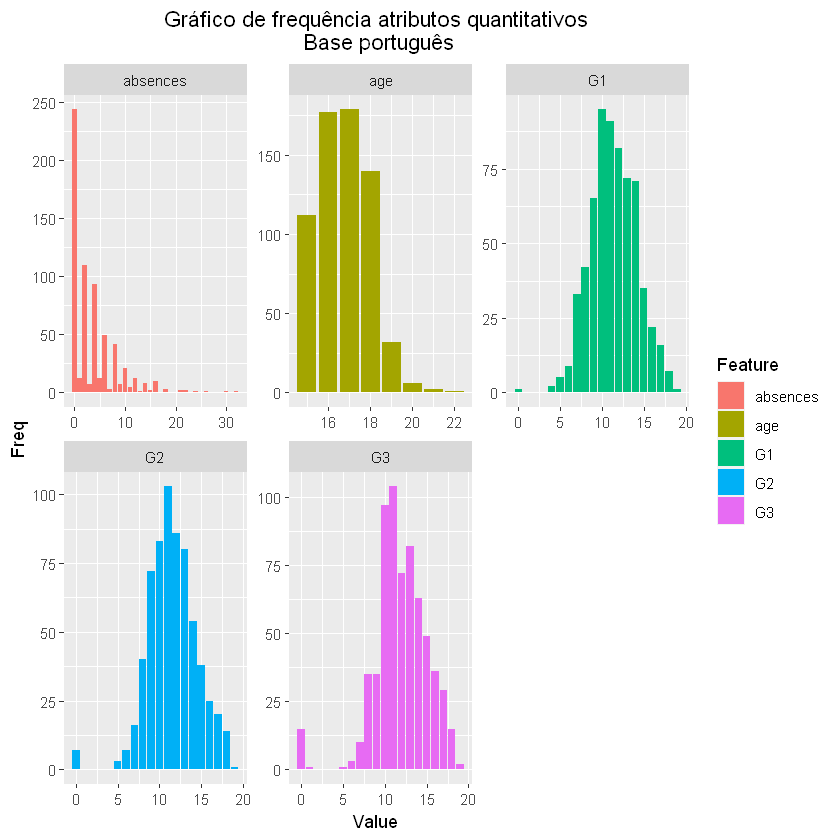

In [6]:
ggplot(sdata_num_port, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência atributos quantitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

### Atributos qualitativos

In [7]:
sdata_qual_port_1 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(-c(Mjob, Fjob, reason, guardian)) %>%
  select(c(1:12)) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_port_2 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(-c(Mjob, Fjob, reason, guardian)) %>%
  select(c(13:24)) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_port_3 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(Mjob, Fjob, reason, guardian) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

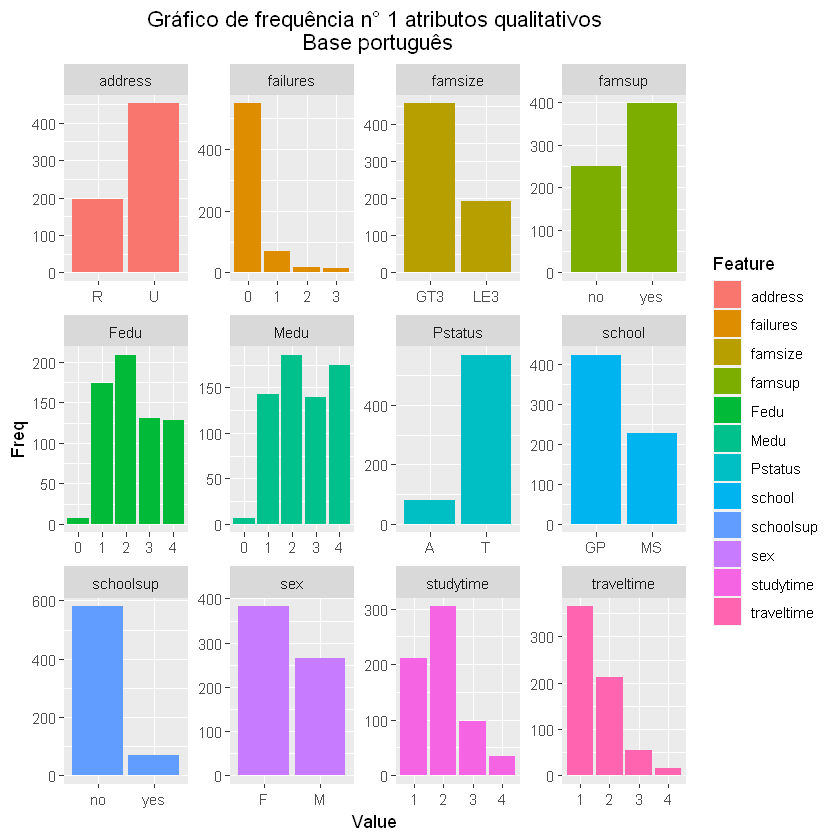

In [8]:
ggplot(sdata_qual_port_1, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 1 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

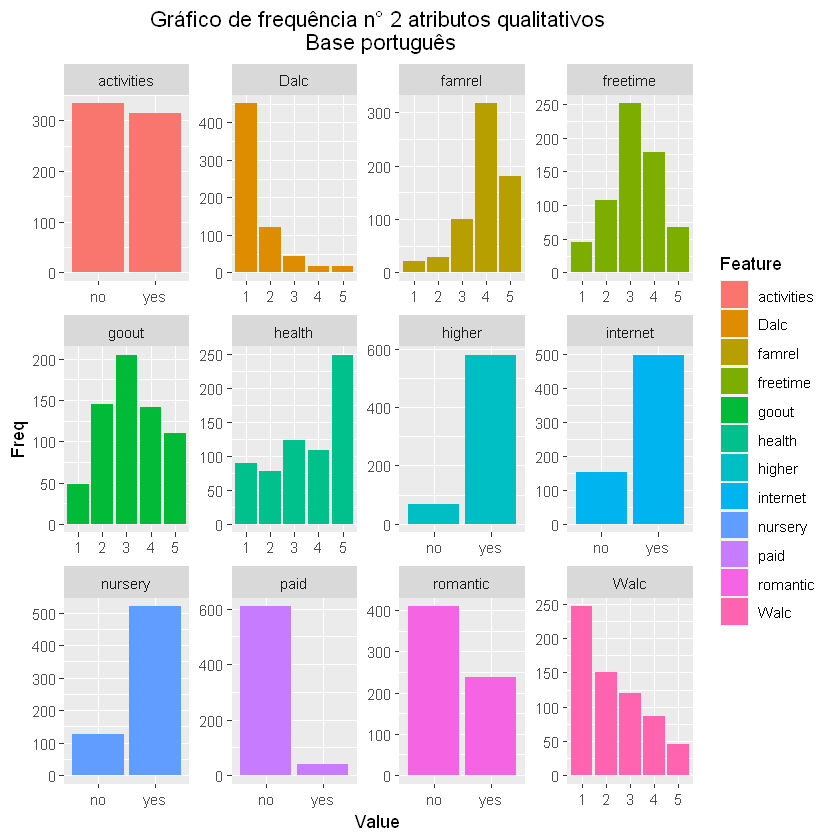

In [9]:
ggplot(sdata_qual_port_2, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 2 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

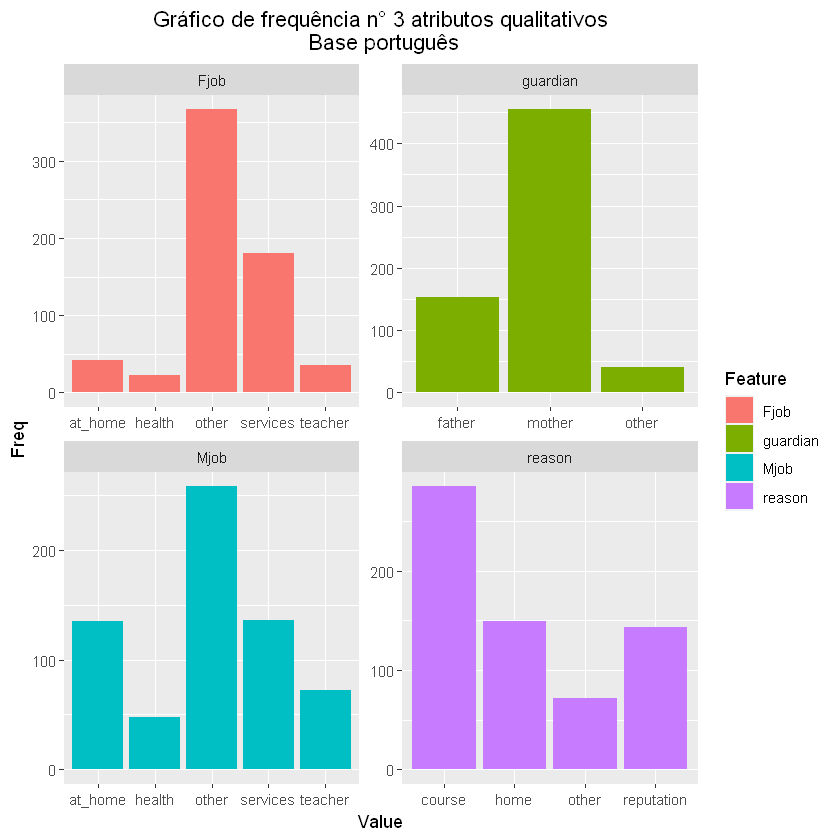

In [10]:
ggplot(sdata_qual_port_3, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 3 atributos qualitativos\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

### Atributos qualitativos mais relevantes

In [11]:
sdata_qual_rel_port_1 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(schoolsup, famsup, failures, paid) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

sdata_qual_rel_port_2 <- 
  data_port %>%
  select(-c(age, absences, G1, G2, G3)) %>%
  select(activities, freetime, studytime, health) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())

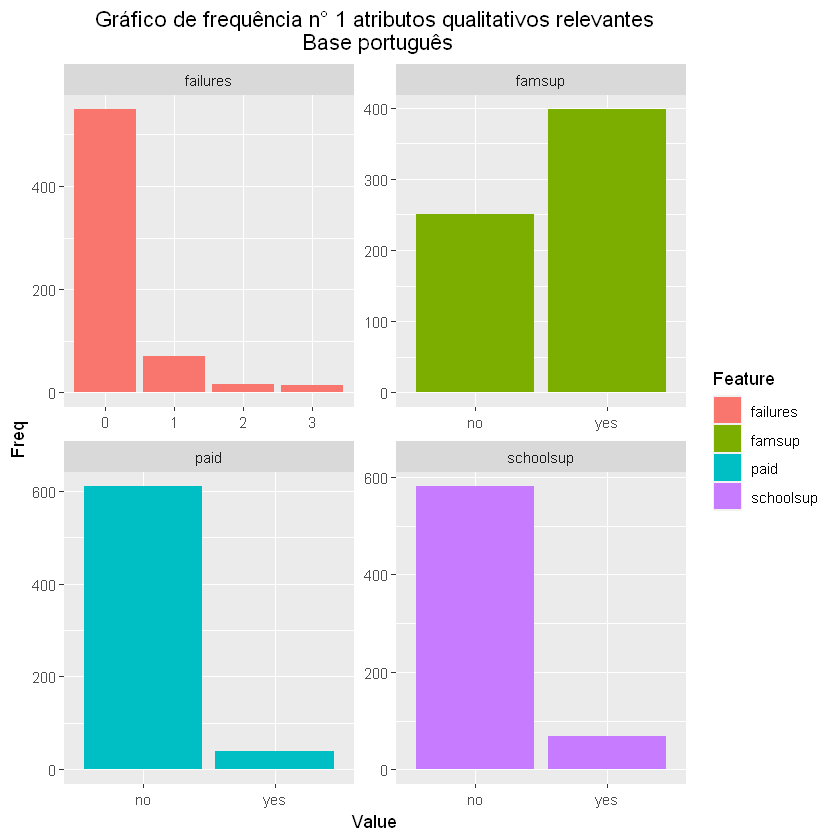

In [12]:
ggplot(sdata_qual_rel_port_1, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 1 atributos qualitativos relevantes\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

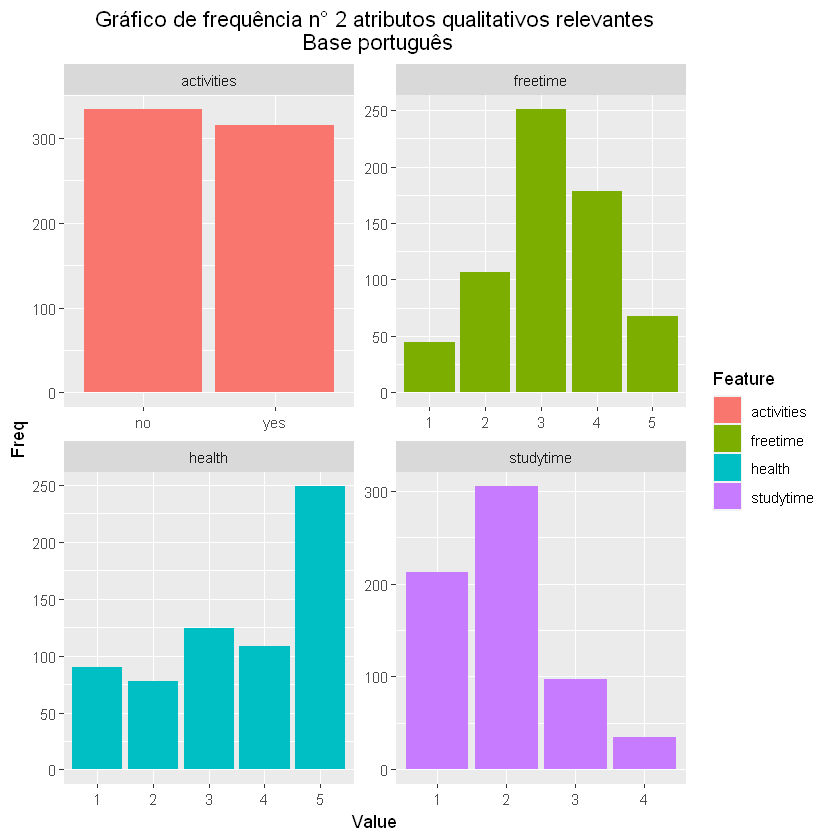

In [13]:
ggplot(sdata_qual_rel_port_2, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência n° 2 atributos qualitativos relevantes\n Base português") +
  theme(plot.title = element_text(hjust = 0.5))

## Boxplot

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



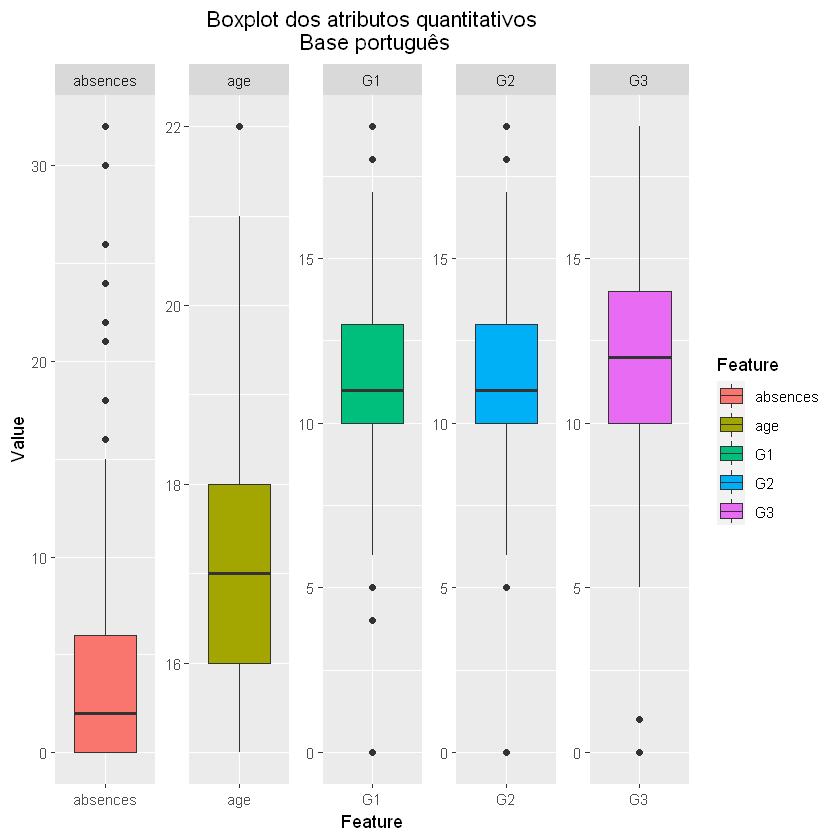

In [14]:
data_port %>%
    type_convert() %>%
    select(G1, G2, G3, age, absences) %>%
    pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
        ggplot(aes(Value, x = Feature, fill = Feature)) +
               geom_boxplot() +
               ggtitle("Boxplot dos atributos quantitativos\n Base português") +
               theme(plot.title = element_text(hjust = 0.5)) +
               facet_wrap(vars(Feature), scales = "free", ncol=5)

## Tabela com estatísticas

In [15]:
data_port %>%
    type_convert() %>%
    select(age, absences, G1, G2, G3) %>%
    pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
    group_by(Feature) %>%
    summarize(Min = min(Value),
              Max = max(Value),
              Range = max(Value) - min(Value),
              Q1 = quantile(Value, .25),
              Q2 = quantile(Value, .50),
              Q3 = quantile(Value, .75),
              Std = sd(Value),
              Mean = mean(Value),
              Var = var(Value),
              Skew = skewness(Value),
              Kurt = kurtosis(Value))

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



Feature,Min,Max,Range,Q1,Q2,Q3,Std,Mean,Var,Skew,Kurt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
absences,0,32,32,0,2,6,4.640759,3.659476,21.536642,2.011362650,5.70053028
age,15,22,7,16,17,18,1.218138,16.744222,1.483859,0.414870724,0.05230014
G1,0,19,19,10,11,13,2.745265,11.399076,7.536481,-0.002760829,0.01780440
G2,0,19,19,10,11,13,2.913639,11.570108,8.489290,-0.358618952,1.62616438
G3,0,19,19,10,12,14,3.230656,11.906009,10.437140,-0.908693770,2.66462641
